In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install numpy matplotlib scipy librosa num2words==0.5.13 tqdm==4.66.1

Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.5.1%2Bcpu-cp310-cp310-linux_x86_64.whl (174.7 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.20.1%2Bcpu-cp310-cp310-linux_x86_64.whl (1.8 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.5.1%2Bcpu-cp310-cp310-linux_x86_64.whl (1.7 MB)
  Using cached https://download.pytorch.org/whl/filelock-3.13.1-py3-none-any.whl (11 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2024.2.0-py3-none-any.whl (170 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Using cached https://download.pytorch.org/whl/networkx-3.2.1-py3-none-any.whl (1.6 MB)
  Using cached https://download.pytorch.org/whl/mpmath-1.3.0-py3-none-any.whl (536 kB)
  Using cached https://download.pytorch.org/whl/pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached https://download.pytorch.org/whl/numpy-

In [9]:
AUDIO_FILE_SAMPLE = '../samples/lesmis_0001.wav'
TEXT_FILE_SAMPLE = '../samples/transcription.txt'
SPACE = ' '
ALPHABET = SPACE + "abcdefghijklmnopqrstuvwxyzàâçéèêëîïôœùûüÿ"
NUMBERS = '0123456789'

### Traitement de texte

Avant d'envoyer le texte en entré du modèle, il faut en premier
le transformer en une séquence de nombre d'entier. Cette dernière
se fera en plusieurs étapes :

1. Charger le texte en mémoire de l'ordinateur;
2. Conversion du texte en munuscule (`lower()`);
3. Traitement des mots spéciaux comme les addresses emails et les noms
de domaines;
4. Conversion des nombres en lettres. Par exemple : **1990**
devient **mille neuf cent quatre-vingt dix**;
5. Supprimer les caractères spécials (les ponctuations, le retour à la ligne et autres);
6. Eclater le texte en séquence de caractères;
7. Faire correspondre chaque caractère de la séquence avec sa position
dans l'alphabet de la langue. 

#### Chargement du texte en mémoire

In [6]:
def read_text(file_path):
    with open(file_path, mode='r', encoding='utf-8') as file:
        return file.read()

In [15]:
transcription = read_text(TEXT_FILE_SAMPLE)
print(transcription)

Les débuts du Machine Learning (apprentissage automatique) sont souvent associés à ceux de l'IA avec la création du célèbre 
test de Turing en 1950. Mais c'est en 1959 que le terme “machine learning” apparait pour la 
première fois, utilisé par Arthur Samuel pour son programme créé en 1952 capable d'apprendre à 
jouer aux dames au fil des parties.




#### Transformation en munuscule (ToLower)

In [16]:
transcription = transcription.lower()
print(transcription)

les débuts du machine learning (apprentissage automatique) sont souvent associés à ceux de l'ia avec la création du célèbre 
test de turing en 1950. mais c'est en 1959 que le terme “machine learning” apparait pour la 
première fois, utilisé par arthur samuel pour son programme créé en 1952 capable d'apprendre à 
jouer aux dames au fil des parties.




#### Traitement des mots spéciaux

In [ ]:
def transcrib_email_addr(email_value):
    """
    Function to transcrib the email address into text.
    """
    return email_value.replace('.', SPACE + 'point' + SPACE) \
                      .replace('@', SPACE + 'arobase' + SPACE)

In [30]:
transcrib_email_addr("dr.mokira@gmail.com")

'dr point mokira arobase gmail point com'

In [46]:
def transcrib_domain_name(domain_value):
    """
    Function to transcrib domain name into text.
    """
    return domain_value.replace('www', 'trois' + SPACE + 'w' + SPACE) \
                       .replace('.', SPACE + 'point' + SPACE)

In [28]:
transcrib_domain_name('www.computer.com')

'trois w  point computer point com'

#### Conversion des nombres en lettre

In [45]:
from num2words import num2words


def num_to_text(num):
    """
    Function which allows to convert to any number
    (integer, real) to text.

    :param num: The number will be transcribe to text.
    :type num: `int`|`float`
    :rtype: `str`
    """
    res = num2words(num, lang='fr')
    res = res.replace('-', SPACE)
    return res

In [12]:
def transcrib_year(value):
    return num_to_text(value)

In [32]:
transcrib_year('1990')

'mille neuf cent quatre vingt dix'

In [41]:
import re


def transcrib_range(value):
    numbers = re.findall(r'[0-9]+', value)
    number = numbers[0]
    str_num = num_to_text(int(number))
    return f"{str_num}{SPACE}ième"

In [42]:
transcrib_range('24ème')

'vingt quatre ième'

In [43]:
def transcrib_country_code(value):
    str_num = num_to_text(value)
    return f"plus{SPACE}{str_num}"

In [44]:
transcrib_country_code("+123")

'plus cent vingt trois'

In [ ]:

class Num2Text:
    """Convert a number to its equivalent text

    :param lang:
        The language selected.
    :param remove_dash:
         If True, we remove the dash character after transcription
         otherwise, we do nothing, after transcription.

    :type lang: `str`
    :type remove_dash: `bool`
    """
    # _PATTERN = r'\b\d+(?:[,.]\d+)?\b'

    def __init__(self, numbers, lang='fr', remove_dash=False):
        self.numbers = numbers
        self.lang = lang
        self.remove_dash = remove_dash

    def to_text(self, num):
        assert num is not None, "The number should not be none."
        if not isinstance(num, int) and not isinstance(num, float):
            raise TypeError("The number must be a int of float type.")
        return num2words(num, lang=self.lang)

    def _transform_year(self, word):
        """
        Function which allows to convert the years to text.
        """
        pattern = re.compile(r'^[0-9]+$')
        words = value.split()
        for word in words:
            is_year = pattern.match(word)
            if not is_year:
                continue

    def transform(self, x):
        result = x[:]
        # num_list = re.findall(self._PATTERN, x)
        for ind, num in enumerate(x):
            number_found = all(map((lambda c: c in self.numbers), num))
            if not number_found:
                continue
            if ',' in num:
                num = num.replace(',', '.')  # eg: 3.1415 -> 3,1415
            if '.' in num:
                value = float(num)
            else:
                value = int(num)
            trans = self.to_text(value)
            if self.remove_dash:
                trans = trans.replace('-', ' ')
            # result = result.replace(str_num, trans, 1)
            result[ind] = trans
        return result

    def __call__(self, x):
        assert x is not None, 'The text should not be none.'
        if not isinstance(x, str):
            raise TypeError("The type must be a string value.")
        if not x:
            return ''
        return self.transform(x)

In [46]:
num2text = Num2Text(NUMBERS)


### Traitement du song

In [ ]:
import os
import librosa


def read_audio_signal(file_path, sample_rate=44100):
    """
    Function of audio signal reading from sound file.
    """
    assert file_path, "The file path is not defined."
    assert sample_rate, "The sample rate is not defined."
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"No such audio file at {file_path}")
    signal, _ = librosa.load(file_path, sr=sample_rate, mono=False)
    return signal

In [5]:
signal_sample = read_audio_signal(AUDIO_FILE_SAMPLE)
print(signal_sample.shape)

(336600,)


In [6]:
def show_audio_signal(signal):
    assert len(signal) > 0, "Signal values are not defined"
    plt.figure()
    plt.plot(signal)
    plt.title("Audio signal")
    plt.show()

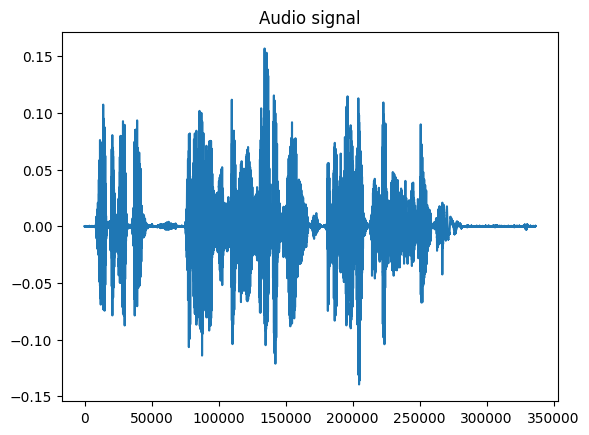

In [7]:
show_audio_signal(signal_sample)

In [8]:
import numpy as np
from scipy.signal import get_window
from librosa.util import normalize, pad_center

def window_sum_square(window, n_frames, hop_length=200, win_length=800,
                      n_fft=800, dtype=np.float32, norm=None):
    """
    Compute the sum-square envelope of a window function
    at a given hop length.

    This is used to estimate modulation effects induced by windowing
    observations in short-time fourier transforms.

    :param window: Window specification, as in `get_window`.
    :param n_frames: The number of analysis frames.
    :param hop_length: The number of samples to advance between frames.
    :param win_length: The length of the window function.
        By default, this matches `n_fft`.
    :param n_fft: The length of each analysis frame.
    :param dtype: The data type of the output.
    
    :return: The sum-squared envelope of the window function.
        shape: `(n_fft + hop_length * (n_frames - 1))`.
    :rtype: `np.ndarray`
    """
    if win_length is None:
        win_length = n_fft
    n = n_fft + hop_length * (n_frames - 1)
    x = np.zeros(n, dtype=dtype)

    # Compute the squared window at the desired length
    win_sq = get_window(window, win_length, fftbins=True)
    win_sq = normalize(win_sq, norm=norm)**2
    win_sq = pad_center(win_sq, size=n_fft)

    # Fill the develope
    for i in range(n_frames):
        sample = i * hop_length
        min_val1 = min(n, sample + n_fft)
        min_val2 = min(n_fft, n - sample)
        x[sample:min_val1] += win_sq[:max(0, min_val2)]
    return x

In [9]:
import torch
import numpy as np
import torch.nn.functional as F
from torch.autograd import Variable
from scipy.signal import get_window
from librosa.util import pad_center, tiny


class STFT(torch.nn.Module):
    """adapted from Prem Seetharaman's https://github.com/pseeth/pytorch-stft"""
    def __init__(self, filter_length=800, hop_length=200, win_length=800,
                 window='hann'):
        super(STFT, self).__init__()
        self.filter_length = filter_length
        self.hop_length = hop_length
        self.win_length = win_length
        self.window = window
        self.forward_transform = None
        scale = self.filter_length / self.hop_length
        fourier_basis = np.fft.fft(np.eye(self.filter_length))

        cutoff = int((self.filter_length / 2 + 1))
        fourier_basis = np.vstack([np.real(fourier_basis[:cutoff, :]),
                                   np.imag(fourier_basis[:cutoff, :])])

        forward_basis = torch.FloatTensor(fourier_basis[:, None, :])
        inverse_basis = torch.FloatTensor(
            np.linalg.pinv(scale * fourier_basis).T[:, None, :])

        if window is not None:
            assert(filter_length >= win_length)
            # get window and zero center pad it to filter_length
            fft_window = get_window(window, win_length, fftbins=True)
            fft_window = pad_center(fft_window, size=filter_length)
            fft_window = torch.from_numpy(fft_window).float()

            # window the bases
            forward_basis *= fft_window
            inverse_basis *= fft_window

        self.register_buffer('forward_basis', forward_basis.float())
        self.register_buffer('inverse_basis', inverse_basis.float())

    def transform(self, input_data):
        num_batches = input_data.size(0)
        num_samples = input_data.size(1)

        self.num_samples = num_samples

        # similar to librosa, reflect-pad the input
        input_data = input_data.view(num_batches, 1, num_samples)
        input_data = F.pad(
            input_data.unsqueeze(1),
            (int(self.filter_length / 2), int(self.filter_length / 2), 0, 0),
            mode='reflect')
        input_data = input_data.squeeze(1)

        forward_transform = F.conv1d(
            input_data,
            Variable(self.forward_basis, requires_grad=False),
            stride=self.hop_length,
            padding=0)

        cutoff = int((self.filter_length / 2) + 1)
        real_part = forward_transform[:, :cutoff, :]
        imag_part = forward_transform[:, cutoff:, :]

        magnitude = torch.sqrt(real_part**2 + imag_part**2)
        phase = torch.autograd.Variable(
            torch.atan2(imag_part.data, real_part.data))

        return magnitude, phase

    def inverse(self, magnitude, phase):
        recombine_magnitude_phase = torch.cat(
            [magnitude*torch.cos(phase), magnitude*torch.sin(phase)], dim=1)

        inverse_transform = F.conv_transpose1d(
            recombine_magnitude_phase,
            Variable(self.inverse_basis, requires_grad=False),
            stride=self.hop_length,
            padding=0)

        if self.window is not None:
            window_sum = window_sumsquare(
                self.window, magnitude.size(-1), hop_length=self.hop_length,
                win_length=self.win_length, n_fft=self.filter_length,
                dtype=np.float32)
            # remove modulation effects
            approx_nonzero_indices = torch.from_numpy(
                np.where(window_sum > tiny(window_sum))[0])
            window_sum = torch.autograd.Variable(
                torch.from_numpy(window_sum), requires_grad=False)
            window_sum = window_sum.cuda() if magnitude.is_cuda else window_sum
            inverse_transform[:, :, approx_nonzero_indices] /= window_sum[approx_nonzero_indices]

            # scale by hop ratio
            inverse_transform *= float(self.filter_length) / self.hop_length

        inverse_transform = inverse_transform[:, :, int(self.filter_length/2):]
        inverse_transform = inverse_transform[:, :, :-int(self.filter_length/2):]

        return inverse_transform

    def forward(self, input_data):
        """
        Compute the transformation and its inverse.
        """
        self.magnitude, self.phase = self.transform(input_data)
        reconstruction = self.inverse(self.magnitude, self.phase)
        return reconstruction

In [10]:
signal_reshape = np.reshape(signal_sample, (1, signal_sample.shape[0]))
signal_reshape = torch.tensor(signal_reshape)
print(signal_reshape.shape)

torch.Size([1, 336600])


In [11]:
stft_transformation = STFT()
magnitude, phase = stft_transformation.transform(signal_reshape)
print('magnitude:', magnitude.shape)
print('phase:', phase.shape)

magnitude: torch.Size([1, 401, 1684])
phase: torch.Size([1, 401, 1684])


In [34]:
def plot_spectrum(spectrum, title="Graphe"):
    # 3. Ploter le spectre
    plt.figure(figsize=(12, 6))
    plt.imshow(spectrum)  # Afficher seulement la moitié positive du spectre
    plt.title(title)
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.xlim(0, spectrum.shape[1])  # Limiter l'axe des x à la moitié de la fréquence d'échantillonnage
    plt.show()

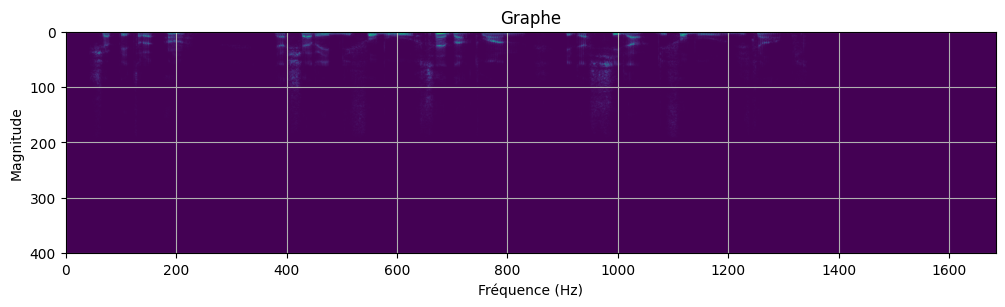

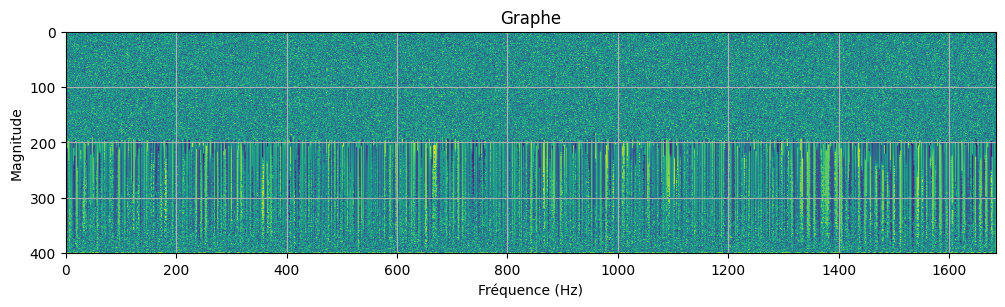

In [35]:
plot_spectrum(magnitude[0])
plot_spectrum(phase[0])